Credit score analysis

purpose of this study to get a look to credit score dataset and find out some metrics which can be used for credit score prediction as client applies for credit to the bank.

In [1]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sjakaev-22/project2/credit_score.csv', sep=',')

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Dataset description

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Base_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments (in USD)

Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour: Represents the payment behavior of the customer (in USD)

Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

In [4]:
#Shape of dataset
print(f'Data contains {data.shape[0]} records and {data.shape[1]} features')

Data contains 100000 records and 28 features


In [5]:
#check the feature datatypes
print('Data:')
data.info()

Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-nul

In [6]:
#clean up some unnessary formating and get the corect datatypes

data['Age'] = data['Age'].str.rstrip('_')
data['Age'] = data['Age'].str.lstrip('_')
data['Num_of_Loan'] = data['Num_of_Loan'].str.rstrip('_')
data['Num_of_Loan'] = data['Num_of_Loan'].str.lstrip('_')
data['Annual_Income'] = data['Annual_Income'].str.rstrip('_')
data['Annual_Income'] = data['Annual_Income'].str.lstrip('_')
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.rstrip('_')
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.lstrip('_')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.rstrip('_')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.lstrip('_')
data['Num_of_Loan'] = data['Num_of_Loan'].str.rstrip('_')
data['Num_of_Loan'] = data['Num_of_Loan'].str.lstrip('_')
data['Monthly_Balance'] = data['Monthly_Balance'].str.rstrip('_')
data['Monthly_Balance'] = data['Monthly_Balance'].str.lstrip('_')
data.Monthly_Balance = data.Monthly_Balance.astype('float')
data.Num_of_Loan = data.Num_of_Loan.astype('int')
data.Monthly_Inhand_Salary = data.Monthly_Inhand_Salary.astype('float')
data.Num_of_Loan = data.Num_of_Loan.astype('float')
data.Outstanding_Debt = data.Outstanding_Debt.astype('float')
data.Amount_invested_monthly = data.Amount_invested_monthly.astype('float')
data.Annual_Income = data.Annual_Income.astype('float')
data.Age = data.Age.astype('int')

In [7]:
print('Data after cleaning:')
data.info()

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan            

In [8]:
# history age is string format - convert it to timestamp in case we need it later 
data.Credit_History_Age

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [9]:
#find two numbers first one number of years second - number of months
#df extraction date will be counted as current date
data['Credit_history_months'] = (6 - data.Credit_History_Age.str.extract('and (\d+)').fillna(0).astype('int')) % 12 + 1
data['Credit_history_years_offset'] = (6 - data.Credit_History_Age.str.extract('and (\d+)').fillna(0).astype('int')) // 12
data['Credit_history_years'] = 2022 - data.Credit_History_Age.str.extract('(\d+) Years').fillna(0).astype('int') 
data['Credit_history_years'] = data['Credit_history_years'] + data['Credit_history_years_offset']
#concatinate the data back
data['Credit_history'] = data.Credit_history_years.astype('str') + '-' + data.Credit_history_months.astype('str') + '-01'
data.Credit_History_Age = pd.to_datetime(data['Credit_history'])
#drop unneeded columns
data.drop(columns = ['Credit_history','Credit_history_years','Credit_history_years_offset','Credit_history_months'], inplace = True)

In [10]:
#data payments have some corrupted entries
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [11]:
print('number of corrupted payment method record is:')
data.query('Payment_Behaviour == "!@9#%8"').Payment_Behaviour.count()

number of corrupted payment method record is:


7600

In [12]:
#this columns would be dropped
data.drop(data[data.Payment_Behaviour == "!@9#%8"].index, inplace=True)
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [13]:
df_datatypes = pd.DataFrame(data.dtypes).reset_index().rename(columns={
    0:'Datatype', 'index' : 'Column Name'
})

categorical_df = df_datatypes[df_datatypes['Datatype'] == 'object']
numerical_df = df_datatypes[df_datatypes['Datatype']!='object']

print("==================================================")
print('Info : There are {} categorical columns'.format(len(categorical_df)))
print('Info : There are {} numerical columns'.format(len(numerical_df)))
print("==================================================")
print('The categorical columns are {}'.format(list((categorical_df['Column Name']))))
print("==================================================")
print('The numerical columns are {}'.format(list((numerical_df['Column Name']))))
print("==================================================")

Info : There are 13 categorical columns
Info : There are 15 numerical columns
The categorical columns are ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
The numerical columns are ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [14]:
df_num_described = data[list(numerical_df['Column Name'])].describe()
print("==================================================")
print("Description of numerical variables")
print("==================================================")
df_num_described.T.reset_index()

Description of numerical variables


index    count          mean           std  \
0                        Age  92400.0  1.097754e+02  6.807664e+02   
1              Annual_Income  92400.0  1.767569e+05  1.434177e+06   
2      Monthly_Inhand_Salary  78558.0  4.193008e+03  3.184528e+03   
3          Num_Bank_Accounts  92400.0  1.707835e+01  1.173330e+02   
4            Num_Credit_Card  92400.0  2.245826e+01  1.289530e+02   
5              Interest_Rate  92400.0  7.260130e+01  4.677205e+02   
6                Num_of_Loan  92400.0  2.961450e+00  6.194050e+01   
7        Delay_from_due_date  92400.0  2.106891e+01  1.487853e+01   
8       Num_Credit_Inquiries  90594.0  2.787136e+01  1.941026e+02   
9           Outstanding_Debt  92400.0  1.425550e+03  1.154398e+03   
10  Credit_Utilization_Ratio  92400.0  3.228554e+01  5.118272e+00   
11       Total_EMI_per_month  92400.0  1.408949e+03  8.324649e+03   
12   Amount_invested_monthly  88268.0  6.373856e+02  2.043283e+03   
13           Monthly_Balance  89762.0 -3.342172e+22  3.337601e+24   

             min           25%           50%           75%           max  
0  -5.000000e+02     24.000000     33.000000     42.000000  8.698000e+03  
1   7.005930e+03  19433.480000  37573.920000  72849.560000  2.419806e+07  
2   3.036454e+02   1623.729167   3089.149167   5964.883333  1.520463e+04  
3  -1.000000e+00      3.000000      6.000000      7.000000  1.798000e+03  
4   0.000000e+00      4.000000      5.000000      7.000000  1.499000e+03  
5   1.000000e+00      8.000000     13.000000     20.000000  5.797000e+03  
6  -1.000000e+02      1.000000      3.000000      5.000000  1.496000e+03  
7  -5.000000e+00     10.000000     18.000000     28.000000  6.700000e+01  
8   0.000000e+00      3.000000      6.000000      9.000000  2.597000e+03  
9   2.300000e-01    566.210000   1165.670000   1945.030000  4.998070e+03  
10  2.000000e+01     28.053576     32.304018     36.496305  5.000000e+01  
11  0.000000e+00     30.291558     69.100853    160.992411  8.233100e+04  
12  0.000000e+00     74.595313    135.891560    265.834695  1.000000e+04  
13 -3.333333e+26    269.947074    336.407725    469.913370  1.602041e+03

From the table it is clear that mean age of 109 years is unrealistic, should be cleaned up, there is a negative number of bank accounts which should not be possible either

In [15]:
df_cat_described = data[list(categorical_df['Column Name'])].describe()
print("==================================================")
print("Description of numerical variables")
print("==================================================")
df_cat_described.T.reset_index()

Description of numerical variables


index  count unique                             top  \
0                       ID  92400  92400                         0x20406   
1              Customer_ID  92400  12500                       CUS_0x4b4   
2                    Month  92400      8                            July   
3                     Name  83160  10139                          Stevex   
4                      SSN  92400  12501                       #F%$D@*&8   
5               Occupation  92400     16                         _______   
6             Type_of_Loan  81880   6260                   Not Specified   
7   Num_of_Delayed_Payment  85980    704                              19   
8     Changed_Credit_Limit  92400   4342                               _   
9               Credit_Mix  92400      4                        Standard   
10   Payment_of_Min_Amount  92400      3                             Yes   
11       Payment_Behaviour  92400      6  Low_spent_Small_value_payments   
12            Credit_Score  92400      3                        Standard   

     freq  
0       1  
1       8  
2   11587  
3      44  
4    5176  
5    6548  
6    1304  
7    4918  
8    1942  
9   33707  
10  48320  
11  25513  
12  49182

In [16]:
#delete all ages which age too big or too small to be bank client
realistic_age = list(range(10,100,1))
data.drop(data.query('Age not in @realistic_age').index, inplace=True)

In [17]:
#delete all records with negative number of bank accounts
data.drop(data.query('Num_Bank_Accounts < 1').index, inplace=True)

In [18]:
df_num_described = data[list(numerical_df['Column Name'])].describe()
print("==================================================")
print("Description of numerical variables")
print("==================================================")
df_num_described.T.reset_index()

Description of numerical variables


index    count          mean           std  \
0                        Age  85921.0  3.313383e+01  1.072460e+01   
1              Annual_Income  85921.0  1.740002e+05  1.418794e+06   
2      Monthly_Inhand_Salary  73037.0  4.125207e+03  3.136825e+03   
3          Num_Bank_Accounts  85921.0  1.788395e+01  1.201602e+02   
4            Num_Credit_Card  85921.0  2.259110e+01  1.291804e+02   
5              Interest_Rate  85921.0  7.264026e+01  4.668210e+02   
6                Num_of_Loan  85921.0  2.958799e+00  6.109160e+01   
7        Delay_from_due_date  85921.0  2.161891e+01  1.492928e+01   
8       Num_Credit_Inquiries  84239.0  2.802790e+01  1.941896e+02   
9           Outstanding_Debt  85921.0  1.456867e+03  1.167945e+03   
10  Credit_Utilization_Ratio  85921.0  3.225550e+01  5.110874e+00   
11       Total_EMI_per_month  85921.0  1.389514e+03  8.260295e+03   
12   Amount_invested_monthly  82102.0  6.331599e+02  2.039334e+03   
13           Monthly_Balance  83468.0 -3.594192e+22  3.461140e+24   

             min           25%           50%           75%           max  
0   1.400000e+01     24.000000     33.000000     41.000000  9.500000e+01  
1   7.005930e+03  19213.830000  36857.220000  71677.590000  2.419806e+07  
2   3.036454e+02   1609.713333   3048.800000   5882.160000  1.520463e+04  
3   1.000000e+00      4.000000      6.000000      8.000000  1.798000e+03  
4   0.000000e+00      4.000000      6.000000      7.000000  1.499000e+03  
5   1.000000e+00      8.000000     14.000000     21.000000  5.797000e+03  
6  -1.000000e+02      2.000000      3.000000      5.000000  1.496000e+03  
7  -5.000000e+00     10.000000     19.000000     28.000000  6.700000e+01  
8   0.000000e+00      3.000000      6.000000      9.000000  2.597000e+03  
9   3.400000e-01    581.050000   1191.910000   2019.550000  4.998070e+03  
10  2.000000e+01     28.026238     32.272919     36.476066  4.956452e+01  
11  0.000000e+00     30.855248     69.574057    162.127336  8.233100e+04  
12  0.000000e+00     73.731236    134.379496    262.596640  1.000000e+04  
13 -3.333333e+26    268.649062    333.458174    463.179724  1.576289e+03

In [19]:
#Shape of dataset after cleaning
print(f'After cleaning data contains {data.shape[0]} records and {data.shape[1]} features')

After cleaning data contains 85921 records and 28 features


In [20]:
print("==================================================")
print("Start of data exploration")
print("==================================================")

Start of data exploration


In [21]:
data.Credit_Score.describe()

count        85921
unique           3
top       Standard
freq         46357
Name: Credit_Score, dtype: object

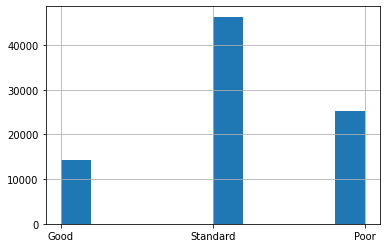

In [22]:
data.Credit_Score.hist()

Check the distribution of different credit ratings. Seems that most of the clients have a standard rating, second is poor and good rating is the most rare

check the numeric values for correlation:


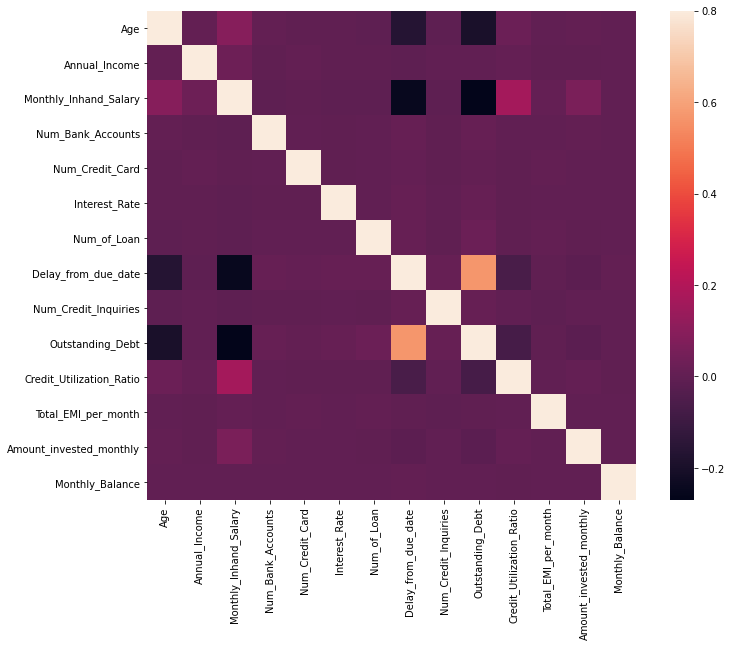

In [28]:
print('check the numeric values for correlation:')
corrmat = data.corr()
f, ax = plt.pyplot.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Seems that there is a strong correlation between delay from due date and outstanding date - as debt keeps piling up with each missed payment.

And lighter correlation between monthly inhad salary and credit utilization ratio, which maybe interesting as inhand salary information available for bank before credit is approved, and better credit utilization ratio means better score.


In [30]:
data.groupby(['Credit_Score'],as_index = False).agg({'Age':'mean'})

Credit_Score        Age
0         Good  36.267140
1         Poor  31.058399
2     Standard  33.307246

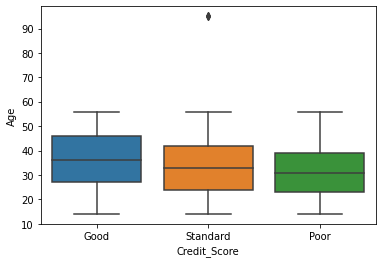

In [32]:
sns.boxplot(x = 'Credit_Score', y = 'Age', data = data)

Judging by boxplot and mean numbers it seems that age can be a factor in resulting credit score but difference is not statisticly significant and probably should not be a key factor in making a decision


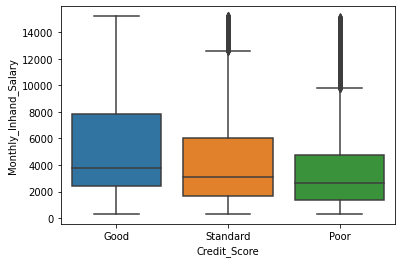

In [35]:
sns.boxplot(x = 'Credit_Score', y = 'Monthly_Inhand_Salary', data = data)

In [36]:
data.groupby(['Credit_Score'],as_index = False).agg({'Monthly_Inhand_Salary':'mean'})

Credit_Score  Monthly_Inhand_Salary
0         Good            5316.137898
1         Poor            3325.475602
2     Standard            4198.215608

The same can be said about the monthly salary even though it can be said that on average there clients with good rating have bigger salary, there is no definitive answer here 

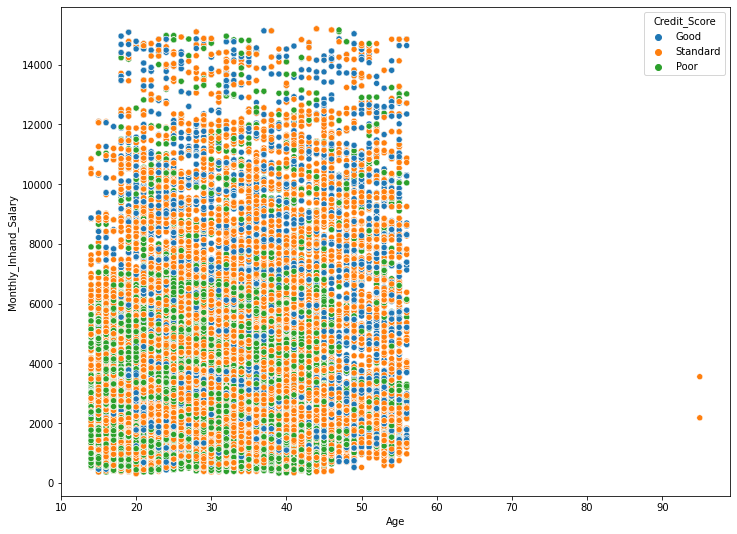

In [40]:
f, ax = plt.pyplot.subplots(figsize=(12, 9))
sns.scatterplot(x = 'Age', y = 'Monthly_Inhand_Salary', hue = 'Credit_Score', data = data)

Even though there is no clear link between age or salary and credit score scatterplot shows that there is kind of a cluster of good credit score at the top right with bigger salary and older clients and poor credit score at bottom left with smaller salary and younger clients.

Maybe we can get a weighted formula to count resulting credit score

In [37]:
data.groupby(['Credit_Score'],as_index = False).agg({'Num_Credit_Card':'mean'})

Credit_Score  Num_Credit_Card
0         Good        21.798467
1         Poor        24.166989
2     Standard        21.972733

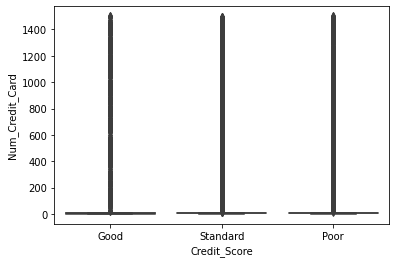

In [38]:
sns.boxplot(x = 'Credit_Score', y = 'Num_Credit_Card', data = data)

huge number outliers here - maybe there is business logic but maybe this is a symptom of a fraud


In [ ]:
sns.scatterplot()